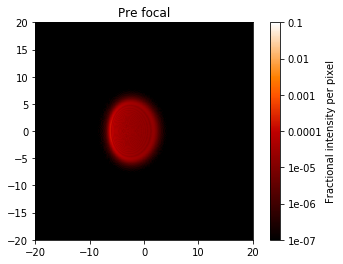

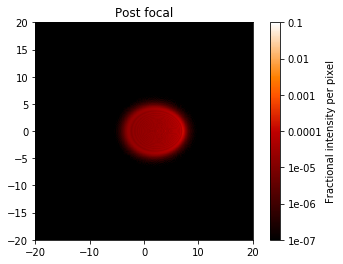

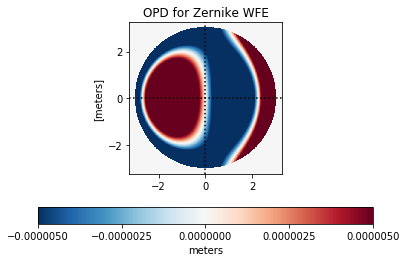

In [6]:
import poppy
import matplotlib.pyplot as plt
import math

wavelength = 550e-9

Zernikes = [0,0,0,0,0,50e-7,0,100e-7,0]

zern = poppy.ZernikeWFE(coefficients=Zernikes, radius=3)

defocus = 200
pscale = 0.1
fov = 40

"""Run the pre focal image"""
osys = poppy.OpticalSystem()
osys.add_pupil( poppy.CircularAperture(radius=1))    # pupil radius in meters
osys.add_pupil(zern)
osys.add_pupil( poppy.ThinLens(nwaves = defocus, reference_wavelength = wavelength, radius=3) )
osys.add_detector(pixelscale=pscale, fov_arcsec=fov)  # image plane coordinates in arcseconds
psfpre = osys.calc_psf(wavelength)                            # wavelength in microns


"""Run the post focal image"""
osys = poppy.OpticalSystem()
osys.add_pupil( poppy.CircularAperture(radius=1))    # pupil radius in meters
osys.add_pupil(zern)
osys.add_pupil( poppy.ThinLens(nwaves = -defocus, reference_wavelength = wavelength, radius=3) )
osys.addRotation(180)
osys.add_detector(pixelscale=pscale, fov_arcsec=fov)  # image plane coordinates in arcseconds
psfpost = osys.calc_psf(wavelength)                            # wavelength in microns

poppy.display_PSF(psfpre, title='Pre focal')
plt.figure()
poppy.display_PSF(psfpost, title='Post focal')
plt.figure()
zern.display(what='opd', opd_vmax = 50e-7)
plt.show()

In [ ]:
ap = 10e-6
A = ap*ap*math.pi
POWER = 16e-6
Intensity = POWER/A
Intensity

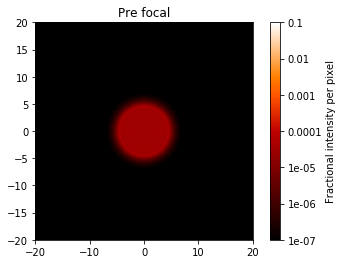

In [9]:
osys = poppy.OpticalSystem()
osys.add_pupil( poppy.CircularAperture(radius=1))    # pupil radius in meters
osys.add_pupil(zern)
osys.add_pupil( poppy.ThinLens(nwaves = defocus, reference_wavelength = wavelength, radius=3) )
osys.add_detector(pixelscale=pscale, fov_arcsec=fov)  # image plane coordinates in arcseconds
psf = osys.calc_psf(wavelength) 
poppy.display_PSF(psf, title='Pre focal')
plt.show()